# Exploratory Data Analysis

In [1]:
import pandas as pd
from collections import Counter
import ast
import numpy as np
import matplotlib.pyplot as plt
import datetime
from skimage.io import imread
import os
import statistics 

## Loading the dataset

In [2]:
data = pd.read_csv("../../data_shares/purrlab/padchest/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv", index_col=0)
for i in data.columns:
    print(i)

ImageID
ImageDir
StudyDate_DICOM
StudyID
PatientID
PatientBirth
PatientSex_DICOM
ViewPosition_DICOM
Projection
MethodProjection
Pediatric
Modality_DICOM
Manufacturer_DICOM
PhotometricInterpretation_DICOM
PixelRepresentation_DICOM
PixelAspectRatio_DICOM
SpatialResolution_DICOM
BitsStored_DICOM
WindowCenter_DICOM
WindowWidth_DICOM
Rows_DICOM
Columns_DICOM
XRayTubeCurrent_DICOM
Exposure_DICOM
ExposureInuAs_DICOM
ExposureTime
RelativeXRayExposure_DICOM
ReportID
Report
MethodLabel
Labels
Localizations
LabelsLocalizationsBySentence
labelCUIS
LocalizationsCUIS


/tmp/ipykernel_7615/3781191273.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../../data_shares/purrlab/padchest/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv", index_col=0)


In [3]:
# Lenght of data 
print(len(data))

160861


In [4]:
len(set(data["PatientID"])) 

67625

In [5]:
len(set(data["StudyID"])) 

109931

In [6]:
len(set(data["ImageID"])) 

160861

In [7]:
Counter(data["MethodLabel"]) 

Counter({'Physician': 39053, 'RNN_model': 121808})

## Example of Chest Xray


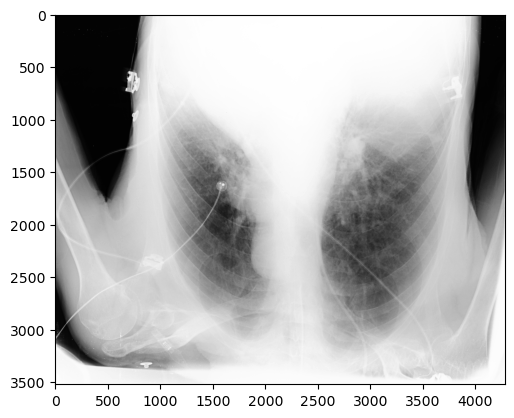

In [8]:
img_id = "216840111366964012339356563862009054142757213_00-060-080.png"
img_dir = "46"
img_path = '../../data_shares/purrlab/padchest/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

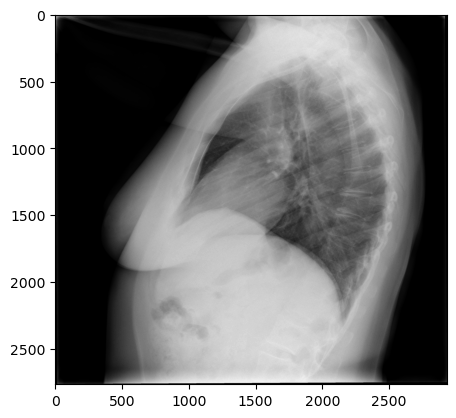

In [9]:
img_id = "83423531682381162626407728390214264447_xfunm7.png"
img_dir = "0"
img_path = '../../data_shares/purrlab/padchest/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

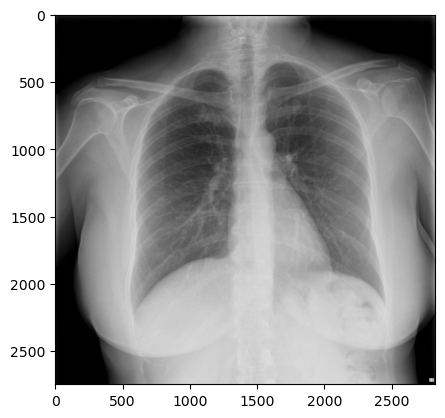

In [10]:
img_id = "84073976391871078977269648559238898238_a4r3kc.png"
img_dir = "0"
img_path = '../../data_shares/purrlab/padchest/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

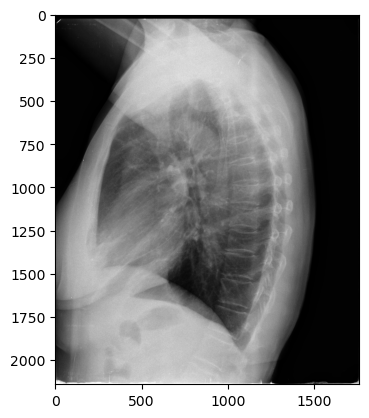

In [11]:
img_id = "4164852466340131591090650472047860911_om64tx.png"
img_dir = "0"
img_path = '../../data_shares/purrlab/padchest/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

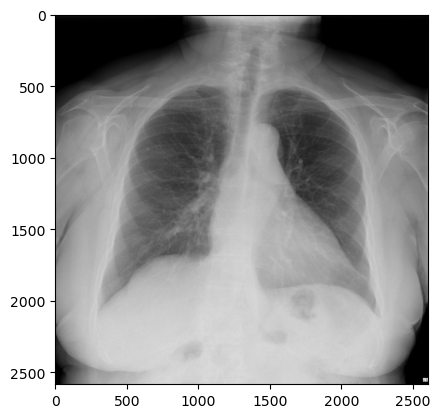

In [12]:
img_id = "99711749323098443927719696849300549782_zqpdv1.png"
img_dir = "1"
img_path = '../../data_shares/purrlab/padchest/' + img_dir + '/' + img_id
img = imread(img_path)

plt.imshow(img, cmap='gray')
plt.show()

In [13]:
img.shape

(2584, 2609)

In [14]:
upside = data[data["ImageID"] == img_id]
upside.T

,5652
ImageID,99711749323098443927719696849300549782_zqpdv1.png
ImageDir,1
StudyDate_DICOM,20171109
StudyID,99711749323098443927719696849300549782
PatientID,38501299273087623906624671625157375623
PatientBirth,1940.0
PatientSex_DICOM,F
ViewPosition_DICOM,PA
Projection,PA
MethodProjection,Manual review of DICOM fields


In [15]:
upside["Report"].iloc[0]

' indic cardiotorac limit significacion patolog . elongacion aortic . granulom calcific lsd . lobulacion diafragmat derech . sin hallazg radiolog signific .'

# Plotting the dataset

### Attribute: Sex

In [16]:
Counter(data["PatientSex_DICOM"])

Counter({'F': 79919, 'M': 80920, 'O': 18, nan: 4})

In [17]:
sex = data.groupby(["PatientSex_DICOM"]).size().reset_index()
sex = sex.rename(columns={0: "count"})
sex["Percentage"] = (sex['count'] / sex['count'].sum()) * 100
sex = sex.replace(['M'], 'Male')
sex = sex.replace(['F'], 'Female')
sex

,PatientSex_DICOM,count,Percentage
0,Female,79919,49.683259
1,Male,80920,50.305551
2,O,18,0.011190


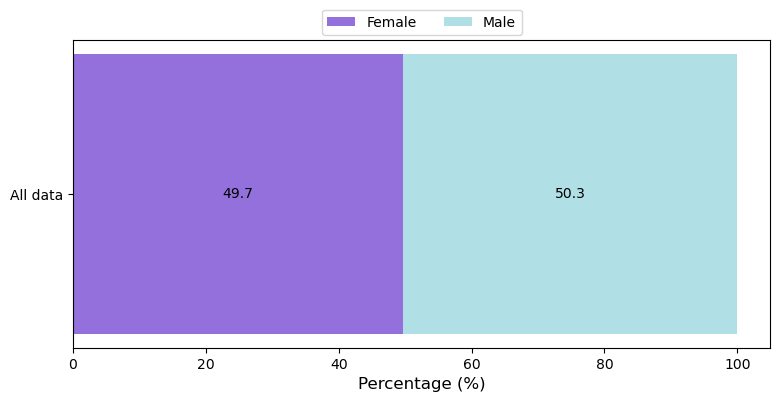

In [18]:

g1 = sex[sex["PatientSex_DICOM"]=="Female"]["Percentage"]
g2 = sex[sex["PatientSex_DICOM"]=="Male"]["Percentage"]
x = ["All data"]

fig, ax = plt.subplots(figsize=(9,4))
p1 = ax.barh(x, g1, color='mediumpurple', label="Female")
p2 = ax.barh(x, g2, left=g1, color='powderblue', label="Male")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fancybox=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.1f')
ax.bar_label(p2, label_type='center', fmt='%.1f')

plt.savefig("Distribution_sex", bbox_inches="tight")

plt.show()

### Atribute: Patient's year of birth

In [19]:
print(max(data["PatientBirth"]))
print(min(data["PatientBirth"]))
print(statistics.mean(data["PatientBirth"].dropna()))
print(statistics.stdev(data["PatientBirth"].dropna()))

2017.0
1904.0
1953.6741350906095
20.027365759932326


In [20]:
# age_non_nan = data[~data["PatientSex_DICOM"].isna()] 
bins= [1900, 1920,1940,1960,1980,2000,2020]
labels = ['1900-1919','1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2022']
data['AgeGroup'] = pd.cut(data['PatientBirth'], bins=bins, labels=labels, right=False)

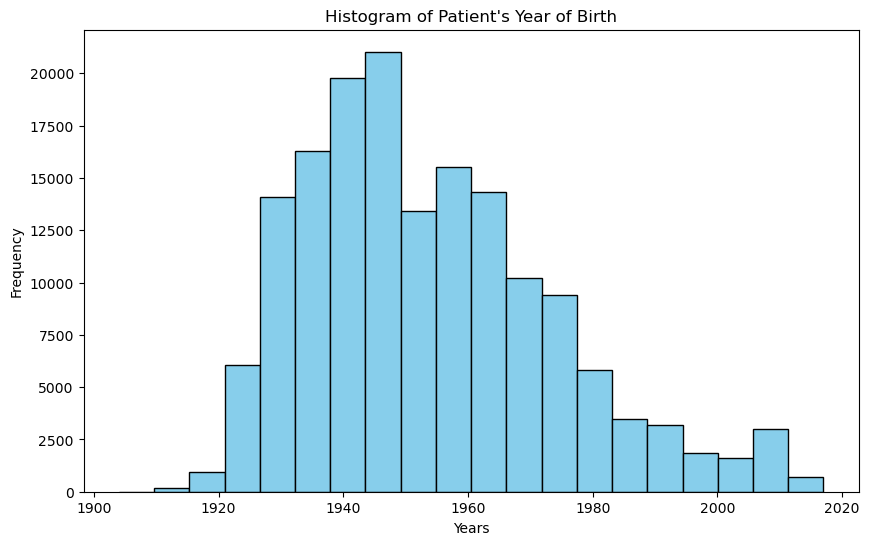

In [21]:
# Sample data: Replace 'your_column_name' with the actual column name you wish to plot
PatientBirth = data['PatientBirth']

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
plt.hist(PatientBirth, bins=20, color='skyblue', edgecolor='black')  # You can adjust the number of bins and colors
plt.title('Histogram of Patient\'s Year of Birth')  # Add a title
plt.xlabel('Years')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

plt.show()


In [22]:
print(data['StudyDate_DICOM'])

0         20140915
1         20150914
2         20150914
3         20150717
4         20150717
            ...   
160856    20110321
160857    20090609
160858    20110415
160859    20101214
160860    20101108
Name: StudyDate_DICOM, Length: 160861, dtype: int64


## Attribute: Patients' age at the time the image was taken 

In [23]:
data["StudyDate_DICOM"][:3]

0    20140915
1    20150914
2    20150914
Name: StudyDate_DICOM, dtype: int64

In [24]:
data["Age"] = [float(str(data["StudyDate_DICOM"][i])[:4])-data["PatientBirth"][i] for i in range(len(data))]
data["Age"][:3]

0    84.0
1    86.0
2    86.0
Name: Age, dtype: float64

In [25]:
print(max(data["Age"]))
print(min(data["Age"]))
print(statistics.mean(data["Age"].dropna()))
print(statistics.stdev(data["Age"].dropna()))

105.0
0.0
58.559628236610614
20.019795093037626


In [26]:
print(len([i for i in data["Age"] if i<2]), "Children under the age of two")

1262 Children under the age of two


In [27]:
# age_non_nan = data[~data["PatientSex_DICOM"].isna()] 
bins= [0,10,20,30,40,50,60,70,80,90,110]
labels = ['0-9', '10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data['AgeGroup'][:3]

0    80-89
1    80-89
2    80-89
Name: AgeGroup, dtype: category
Categories (10, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '60-69' < '70-79' < '80-89' < '90+']

In [28]:

age = data.groupby(["AgeGroup"]).size().reset_index()
age = age.rename(columns={0: "Count"})
age["Percentage"] = (age['Count'] / age['Count'].sum()) * 100
age

,AgeGroup,Count,Percentage
0,0-9,4823,2.998353
1,10-19,3298,2.050294
2,20-29,6404,3.981225
3,30-39,12014,7.468838
4,40-49,20857,12.966336
5,50-59,25587,15.906873
6,60-69,32562,20.243076
7,70-79,33842,21.038824
8,80-89,19385,12.051226
9,90+,2083,1.294955


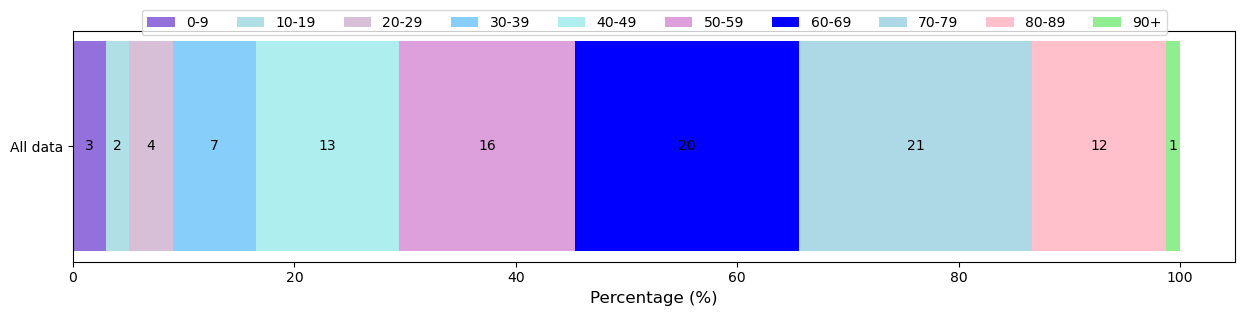

In [29]:

g1 = age["Percentage"][0]
g2 = age["Percentage"][1]
g3 = age["Percentage"][2]
g4 = age["Percentage"][3]
g5 = age["Percentage"][4]
g6 = age["Percentage"][5]
g7 = age["Percentage"][6]
g8 = age["Percentage"][7]
g9 = age["Percentage"][8]
g10 = age["Percentage"][9]


x = ["All data"]

fig, ax = plt.subplots(figsize=(15,3))
p1 = ax.barh(x, g1, color='mediumpurple', label=age["AgeGroup"][0])
p2 = ax.barh(x, g2, left=(g1), color='powderblue', label=age["AgeGroup"][1])
p3 = ax.barh(x, g3, left=(g1+g2), color='thistle', label=age["AgeGroup"][2])
p4 = ax.barh(x, g4, left=(g1+g2+g3), color='lightskyblue', label=age["AgeGroup"][3])
p5 = ax.barh(x, g5, left=(g1+g2+g3+g4), color='paleturquoise', label=age["AgeGroup"][4])
p6 = ax.barh(x, g6, left=(g1+g2+g3+g4+g5), color='plum', label=age["AgeGroup"][5])
p7 = ax.barh(x, g7, left=(g1+g2+g3+g4+g5+g6), color='blue', label=age["AgeGroup"][6])
p8 = ax.barh(x, g8, left=(g1+g2+g3+g4+g5+g6+g7), color='lightblue', label=age["AgeGroup"][7])
p9 = ax.barh(x, g9, left=(g1+g2+g3+g4+g5+g6+g7+g8), color='pink', label=age["AgeGroup"][8])
p10 = ax.barh(x, g10, left=(g1+g2+g3+g4+g5+g6+g7+g8+g9), color='lightgreen', label=age["AgeGroup"][9])



ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=10, fancybox=True)#, shadow=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.0f')
ax.bar_label(p2, label_type='center', fmt='%.0f')
ax.bar_label(p3, label_type='center', fmt='%.0f')
ax.bar_label(p4, label_type='center', fmt='%.0f')
ax.bar_label(p5, label_type='center', fmt='%.0f')
ax.bar_label(p6, label_type='center', fmt='%.0f')
ax.bar_label(p7, label_type='center', fmt='%.0f')
ax.bar_label(p8, label_type='center', fmt='%.0f')
ax.bar_label(p9, label_type='center', fmt='%.0f')
ax.bar_label(p10, label_type='center', fmt='%.0f')


plt.savefig("Distribution_sex", bbox_inches="tight")

plt.show()

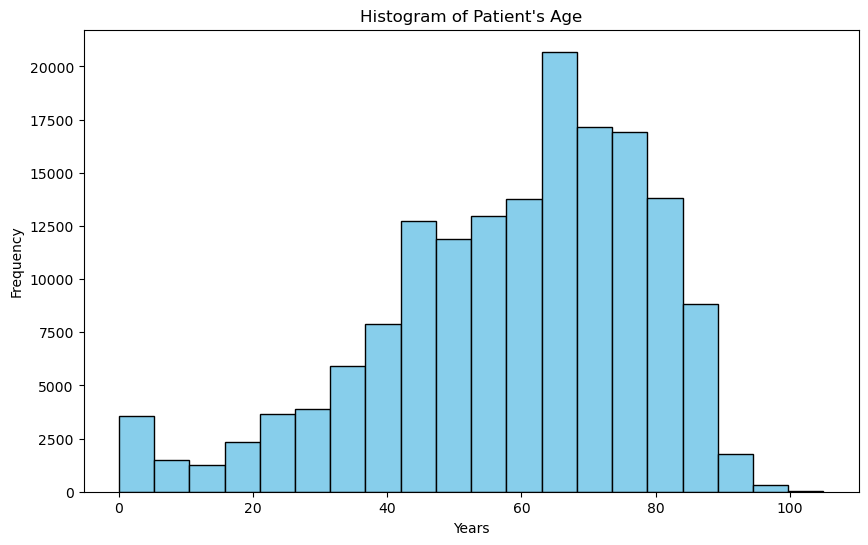

In [70]:
# Sample data: Replace 'your_column_name' with the actual column name you wish to plot
Age = data['Age']

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
plt.hist(Age, bins=20, color='skyblue', edgecolor='black')  # You can adjust the number of bins and colors
plt.title('Histogram of Patient\'s Age')  # Add a title
plt.xlabel('Years')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

plt.show()

<Axes: xlabel='AgeGroup'>

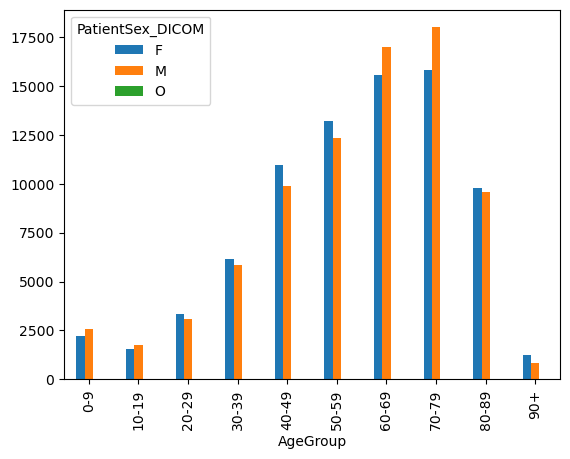

In [30]:
pd.crosstab(data['AgeGroup'],data['PatientSex_DICOM']).plot.bar()

## Attributes: Count of others 

### Labels methods

In [31]:
Counter(data["MethodLabel"])

Counter({'Physician': 39053, 'RNN_model': 121808})

### PatientID 

In [32]:
id_counts = data['PatientID'].value_counts()
id_counts["168550076836128609595241571786282061120"]

119

In [33]:
print(max(id_counts.values))
print(min(id_counts.values))
print(statistics.mean(id_counts.values))
print(statistics.stdev(id_counts.values))

119
1
2
2.23606797749979


In [34]:
Counter(list(id_counts.values))

Counter({119: 1,
         69: 1,
         53: 1,
         49: 1,
         48: 1,
         46: 1,
         45: 1,
         44: 1,
         41: 1,
         40: 2,
         38: 1,
         37: 3,
         36: 1,
         35: 2,
         34: 5,
         33: 2,
         32: 4,
         31: 6,
         30: 5,
         29: 4,
         28: 4,
         27: 8,
         26: 5,
         25: 4,
         24: 14,
         23: 16,
         22: 17,
         21: 15,
         20: 29,
         19: 19,
         18: 34,
         17: 38,
         16: 71,
         15: 57,
         14: 106,
         13: 92,
         12: 170,
         11: 173,
         10: 311,
         9: 333,
         8: 617,
         7: 713,
         6: 1465,
         5: 1641,
         4: 4952,
         3: 5497,
         2: 25924,
         1: 25256})

### Number of people that have many images 

In [35]:
image_count = [id_counts[i] for i in data['PatientID']]
data["ImageCount"] = image_count

data_many_img = data[data["ImageCount"]>20]
len(data_many_img)

3616

In [36]:
age = data_many_img.groupby(["AgeGroup"]).size().reset_index()
age = age.rename(columns={0: "count"})
age["Percentage"] = (age['count'] / age['count'].sum()) * 100
age

,AgeGroup,count,Percentage
0,0-9,0,0.000000
1,10-19,28,0.774336
2,20-29,86,2.378319
3,30-39,75,2.074115
4,40-49,470,12.997788
5,50-59,240,6.637168
6,60-69,1084,29.977876
7,70-79,1224,33.849558
8,80-89,409,11.310841
9,90+,0,0.000000


In [37]:
sex = data_many_img.groupby(["PatientSex_DICOM"]).size().reset_index()
sex = sex.rename(columns={0: "count"})
sex["Percentage"] = (sex['count'] / sex['count'].sum()) * 100
sex = sex.replace(['M'], 'Male')
sex = sex.replace(['F'], 'Female')
sex

,PatientSex_DICOM,count,Percentage
0,Female,1421,39.297566
1,Male,2195,60.702434


In [38]:
view = data_many_img.groupby(["Projection"]).size().reset_index()
view = view.rename(columns={0: "count"})
view["Percentage"] = (view['count'] / sex['count'].sum()) * 100
view

,Projection,count,Percentage
0,AP,453,12.527655
1,AP_horizontal,1520,42.035398
2,COSTAL,6,0.165929
3,L,750,20.741150
4,PA,887,24.529867


In [40]:
data_2above_img = data[data["ImageCount"]>1]

In [41]:
proj = data_2above_img.groupby(['PatientID'])['Projection'].unique()

In [42]:
proj_df = pd.DataFrame({'PatientID':proj.index, 'Projection':proj.values})

proj_df["Img_counts"] = [id_counts[i] for i in proj_df["PatientID"]]
proj_df

,PatientID,Projection,Img_counts
0,100002652742762245719447501824197948584,[PA],2
1,100008301845755693600822040133468866003,"[L, PA]",2
2,100013367876124980580350390072254146837,"[L, PA]",2
3,100014526679878874282545967909115176328,[COSTAL],2
4,100026982716795250809914871389223660538,"[PA, L]",4
...,...,...,...
42364,99977330444819351587532682813262128698,"[L, PA]",2
42365,99979708337329214928518506735000917230,"[L, PA]",2
42366,99989433929300678544231537506014508519,"[L, PA]",2
42367,99992124762132515373421969297291943105,"[PA, L]",2


In [43]:
print(proj["100002652742762245719447501824197948584"])
print(len(proj["100002652742762245719447501824197948584"]))

['PA']
1


In [44]:
proj[1]

array(['L', 'PA'], dtype=object)

In [45]:
proj_counts = [len(i) for i in proj]
Counter(proj_counts)

Counter({1: 5221, 2: 34447, 3: 2304, 4: 393, 5: 4})

In [46]:
p = [tuple(i.tolist()) for i in proj]
Counter(p)

Counter({('PA',): 3994,
         ('L', 'PA'): 17500,
         ('COSTAL',): 64,
         ('PA', 'L'): 14687,
         ('AP_horizontal', 'AP'): 201,
         ('PA', 'L', 'AP_horizontal'): 345,
         ('AP_horizontal',): 929,
         ('AP',): 197,
         ('AP', 'PA', 'L'): 60,
         ('AP', 'PA', 'AP_horizontal'): 30,
         ('PA', 'AP_horizontal'): 606,
         ('AP_horizontal', 'L'): 45,
         ('AP_horizontal', 'AP', 'PA'): 46,
         ('COSTAL', 'PA', 'L'): 26,
         ('L', 'PA', 'AP_horizontal'): 389,
         ('AP_horizontal', 'PA'): 682,
         ('AP_horizontal', 'L', 'AP'): 5,
         ('PA', 'AP', 'L'): 43,
         ('PA', 'AP', 'AP_horizontal'): 45,
         ('AP', 'PA'): 134,
         ('AP', 'AP_horizontal'): 184,
         ('AP_horizontal', 'PA', 'L'): 302,
         ('AP_horizontal', 'L', 'PA'): 285,
         ('L', 'PA', 'AP'): 118,
         ('PA', 'AP', 'L', 'AP_horizontal'): 6,
         ('PA', 'AP_horizontal', 'L'): 128,
         ('L', 'AP', 'PA'): 20,
       

## Modality

In [47]:
Counter(data['Modality_DICOM'])
# CR = Computed Radiography
# DX = Digital Radiography

Counter({'CR': 148862, 'DX': 11999})

## Pixel aspect ratio

In [48]:

Counter(data['PixelAspectRatio_DICOM'])

Counter({'None': 112858, "['1', '1']": 48003})

## XRayTubbeCurrent_DICOM

In [49]:
# https://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_C.8.7.8.html#table_C.8-33
# This Module describes the Attributes related to dose delivery from an X-Ray source during the acquisition of an X-Ray image.
# X-Ray Tube Current in mA.
Counter(data['XRayTubeCurrent_DICOM'])

Counter({'250': 33079,
         '400': 18064,
         '320': 15050,
         'None': 57985,
         '0': 23155,
         '500': 13190,
         '200': 59,
         '160': 82,
         '125': 7,
         '100': 189,
         '640': 1})

## Locations

In [51]:
Counter(data['Localizations']).most_common()[:10]

[('[]', 65523),
 ("['loc cardiac']", 6242),
 ("['loc aortic']", 2777),
 ("['loc aortic', 'loc cardiac']", 1483),
 ("['loc hilar']", 1186),
 ("['loc right upper lobe']", 1105),
 ("['loc right']", 1013),
 ("['loc right', 'loc basal']", 781),
 ("['loc pleural']", 753),
 ("['loc left', 'loc basal']", 718)]

## Pediatric images

In [52]:
Counter(data["Pediatric"])

Counter({'No': 160587, 'PED': 274})

In [53]:
len([i for i in data["Age"] if i<2])

1262

In [57]:
ped = data[data["Pediatric"]=='PED']
Counter(ped["AgeGroup"])

Counter({'40-49': 2, '0-9': 255, '10-19': 15, '60-69': 1, '20-29': 1})

In [56]:
max(ped["Age"])

69.0

In [58]:
ped.iloc[0]

ImageID                            62099871704902880343187697364243424587_5pzx3y.png
ImageDir                                                                           0
StudyDate_DICOM                                                             20151216
StudyID                                       62099871704902880343187697364243424587
PatientID                                    265226117459810257716713056305789256033
PatientBirth                                                                  1968.0
PatientSex_DICOM                                                                   F
ViewPosition_DICOM                                                   POSTEROANTERIOR
Projection                                                                        PA
MethodProjection                                       Manual review of DICOM fields
Pediatric                                                                        PED
Modality_DICOM                                                   

## Aspect ratio

In [61]:
paths = ['../../data_shares/purrlab/padchest/' + str(data['ImageDir'][i]) + '/' + str(data['ImageID'][i]) for i in range(len(data))]
paths[:2]

['../../data_shares/purrlab/padchest/0/20536686640136348236148679891455886468_k6ga29.png',
 '../../data_shares/purrlab/padchest/0/135803415504923515076821959678074435083_fzis7d.png']

In [63]:
# finding the shapes of the images to check if the are the same as rows and columns

# shapes = []
# for i in range(len(data)):
#     img = imread(paths[i])
#     shapes.append(img.shape)
# shapes

## PCA Analysis


In [64]:
from sklearn.decomposition import PCA

In [68]:
data

,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,...,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS,AgeGroup,Age,ImageCount
0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[],80-89,84.0,1
1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,Manual review of DICOM fields,...,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378'],80-89,86.0,6
2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378'],80-89,86.0,6
3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151'],90+,90.0,2
4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,Manual review of DICOM fields,...,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151'],90+,90.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160856,1284011361929414522814654121696751542351444145...,49,20110321,1284011361929414522814654121696751542351444145...,112930952416074060371371014599496493673,1948.0,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,import sign radiolog epoc . pinzamient ambos ...,RNN_model,"['COPD signs', 'costophrenic angle blunting']",['loc costophrenic angle'],"['COPD signs', 'costophrenic angle blunting', ...",['C0024117' 'C0742855'],['C0230151'],60-69,63.0,16
160857,1284011361929414522094646571696751542351444145...,49,20090609,1284011361929414522094646571696751542351444145...,282743729971423358706056731890510600934,1944.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,dentr normal .,RNN_model,['normal'],[],['normal'],[],[],60-69,65.0,4
160858,1284011361929414522086390631696751542351444145...,49,20110415,1284011361929414522086390631696751542351444145...,52648743308541843883453242716226652771,1965.0,M,NaN,AP_horizontal,Manual review of DICOM fields,...,tub endotraqueal sond nasogastr situacion cor...,RNN_model,"['NSG tube', ' endotracheal tube']",['loc tracheal'],"['NSG tube', ' endotracheal tube', 'loc trache...",['C0336630'],['C0040578'],40-49,46.0,7
160859,1284011361929414522084108901696751542351444145...,49,20101214,1284011361929414522084108901696751542351444145...,228646130593152933811948996634154201216,1943.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,dentr normal .,RNN_model,['normal'],[],['normal'],[],[],60-69,67.0,5
